In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [49]:
#C40 redshift parameters
one_three = ["a=0.1644", "a=0.1615", "a=0.1593", "a=0.1590", "a=0.1588"]
three_five = ["a=0.1566", "a=0.1544","a=0.1570","a=0.1563","a=0.1545","a=0.1569","a=0.1539"]
five_seven = ["a=0.1515","a=0.1499","a=0.1544","a=0.1518","a=0.1493","a=0.1519","a=0.1494","a=0.1500"]
seven_nine = ["a=0.1476", "a=0.1452","a=0.1476","a=0.1452","a=0.1477","a=0.1588","a=0.1453","a=0.1472"]
nine_one = ["a=0.1430", "a=0.1400","a=0.1429","a=0.1430","a=0.1405","a=0.1409","a=.1435"]

In [84]:
def cdf_tau_quantile(directory, res_files, target_files,valid_start_chars,los,combined_annotation,xy_position):
    all_dataframes = []
    for subdir in os.listdir(directory):
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files:
                    for res_file in res_files:
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_dataframes.append(df)

    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    z = combined_df.transpose()
    df= [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)]
    one = np.linspace(0,1,los)
    q25_arr = []
    q75_arr = []
    q50_arr = []
    q5_arr = []
    q95_arr = []
    for i in range(len(one)):
        tau_1 = []
        index_1 = np.abs(np.array(one)-one[i]).argmin()
        for j in df:
            first_row = j.iloc[0]
            tau = -np.log(np.array(first_row))
            tau_sort = np.sort(tau)
            tau_1_value = tau_sort[index_1]
            tau_1.append(tau_1_value)
        tau_1 = np.array(tau_1)
        q25 = np.quantile(tau_1, .25)
        q75 = np.quantile(tau_1, .75)
        q50 = np.quantile(tau_1, .5)
        q5 = np.quantile(tau_1,.05)
        q95 = np.quantile(tau_1,.95)
        q50_arr.append(q50)
        q25_arr.append(q25)
        q75_arr.append(q75)
        q5_arr.append(q5)
        q95_arr.append(q95)
    plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
    plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
    plt.xlabel('tau')
    plt.ylabel('CDF')
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position,  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
    plt.plot(q50_arr,one,label='Median',color='black')
    plt.legend(loc='upper left')
    plt.show() 

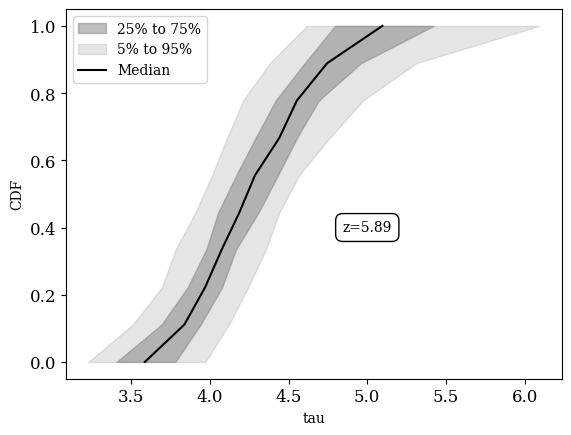

In [97]:
cdf_tau_quantile(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],['a=0.1452','a=0.1453'],['A'],10,'z=5.89',(5, .4))

In [86]:
def histogram(directory, res_file, target_files,valid_start_chars,los,cdf,combined_annotation,xy_position,scale):
    all_dataframes = []
    for subdir in os.listdir(directory):
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files:
                    file_path = os.path.join(subdir_path, file_name, res_file)
                    #print(file_path)
                    if os.path.isfile(file_path):
                        df = pd.read_csv(file_path, delimiter=' ')
                        all_dataframes.append(df)
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    z = combined_df.transpose()
    df= [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)]
    tau_1 = [] 
    one = np.linspace(0,1,los)
    for i in df:
        first_row = i.iloc[0] 
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        index_1 = np.abs(np.array(one) - cdf).argmin()
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='large')
    plt.rc('ytick', labelsize='large')
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    #combined_annotation = r'z=5.45' 
    plt.annotate(combined_annotation, xy=xy_position,  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
    plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
    plt.yscale(scale)
    plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_10772\203929895.py:22: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


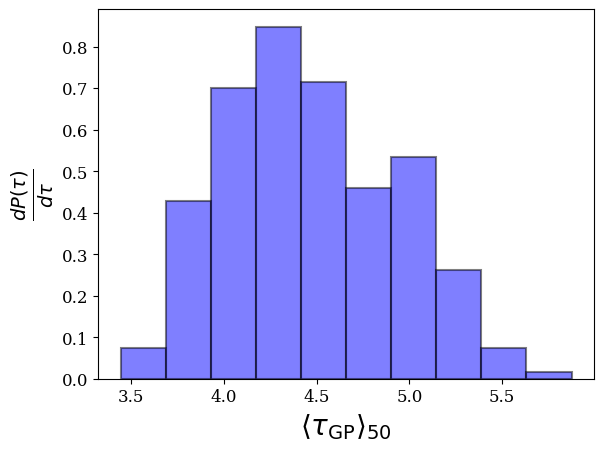

In [87]:
histogram(r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40',"avgflux.x50.res",nine_one,['A','C','F'],10,.1,r'5.3 < z < 5.5',(2.75,1),'linear')

C:\Users\eawer\AppData\Local\Temp\ipykernel_10772\3916109560.py:46: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


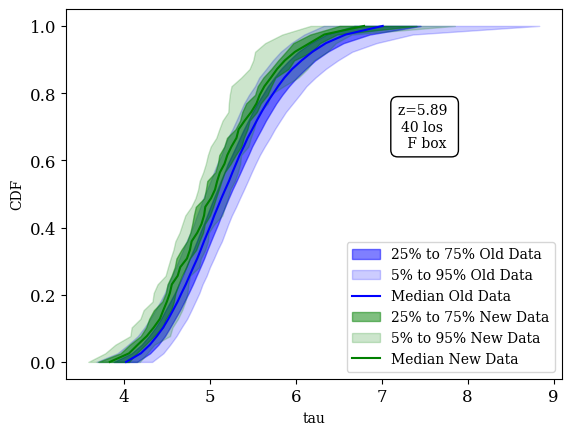

In [99]:
#comparing old and new data
directory = r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40'
valid_start_chars = ['F']
res_files = ['avgflux.x50.resL6','avgflux.x50.res']
target_files = ["a=0.1452","a=0.1453"]
los = 40
combined_annotation = 'z=5.89 \n40 los \n F box'
xy_position = (7.5, .7)

all_dataframes_dict = {res_file: [] for res_file in res_files}

for subdir in os.listdir(directory):
    if subdir[0] in valid_start_chars:
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file_name in target_files:
                for res_file in res_files:
                    file_path = os.path.join(subdir_path, file_name, res_file)
                    if os.path.isfile(file_path):
                        #print(file_path)
                        df = pd.read_csv(file_path, delimiter=' ')
                        #print(df)
                        all_dataframes_dict[res_file].append(df)

colors = ['blue', 'green']
labels = ['Old Data', 'New Data']

for res_file, color, label in zip(res_files, colors, labels):
    combined_df = pd.concat(all_dataframes_dict[res_file], ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    #print(combined_df)
    z = combined_df.transpose()
    df = [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)]
    one = np.linspace(0,1,los)
    q25_arr = []
    q75_arr = []
    q50_arr = []
    q5_arr = []
    q95_arr = []
    for i in range(len(one)):
        tau_1 = []
        index_1 = np.abs(np.array(one)-one[i]).argmin()
        #print(index_1)
        for j in df:
            first_row = j.iloc[0]
            tau = -np.log(np.array(first_row))
            tau_sort = np.sort(tau)
            tau_1_value = tau_sort[index_1]
            tau_1.append(tau_1_value)
        tau_1 = np.array(tau_1)
        q25 = np.quantile(tau_1, .25)
        q75 = np.quantile(tau_1, .75)
        q50 = np.quantile(tau_1, .5)
        q5 = np.quantile(tau_1, .05)
        q95 = np.quantile(tau_1, .95)
        q50_arr.append(q50)
        q25_arr.append(q25)
        q75_arr.append(q75)
        q5_arr.append(q5)
        q95_arr.append(q95)
        #print(np.max(tau_1))
    plt.fill_betweenx(one, q25_arr, q75_arr, color=color, alpha=0.5, label=f'25% to 75% {label}')
    plt.fill_betweenx(one, q5_arr, q95_arr, color=color, alpha=0.2, label=f'5% to 95% {label}')
    plt.plot(q50_arr, one, label=f'Median {label}', color=color)

plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.annotate(combined_annotation, xy=xy_position, bbox=bbox_props, ha='center', va='center')
plt.legend(loc='lower right')
plt.show()
